In [1]:
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

C:\Users\BASH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BASH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BASH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BASH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
data = pd.read_csv('C:/Users/BASH/Desktop/sapa/train.csv')
test_data = pd.read_csv('C:/Users/BASH/Desktop/sapa/test.csv')

In [3]:
data

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,ID_XWINUFGG,1970,Graduation,Married,52893.6,1,1,19-06-2014,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0
1564,ID_GLVIHZLR,1980,Graduation,Single,74190.0,0,1,07-08-2013,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0
1565,ID_O11VSIJY,1952,Master,Married,80857.2,0,1,15-01-2013,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0
1566,ID_VS37P6MS,1964,PhD,Single,58701.6,1,1,12-04-2014,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0


In [4]:
test_data

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,ID_1D68PV28,1975,Graduation,Married,80934.0,0,1,12-08-2012,70,5,9,6,12,762,83,217,29,80,11,6,0,0,0,0,0,0
668,ID_TM6CYFZO,1955,Graduation,Divorced,84052.8,0,1,18-02-2013,53,4,7,10,5,1078,3,250,153,14,14,5,0,0,0,0,0,0
669,ID_VHR666SC,1952,PhD,Married,63974.4,0,0,09-08-2013,39,1,5,1,5,246,3,12,0,0,25,7,0,0,0,0,0,0
670,ID_O852YAO1,1960,Graduation,Together,69548.4,0,1,19-08-2013,31,7,4,6,8,295,62,177,77,5,29,3,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [7]:
test_data['Response'] = 'test'
concat_data = pd.concat([data, test_data]).reset_index(drop=True)

**Since 2 the functions below here perform preproceiing on the train data and also split it into training and testing set to, i break it up to only perfrom the preprocessing so that the test_data will also under go same preprocessing and the test_data wont be split into train and test set
**

In [8]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [9]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    
    # Fill missing Income values with column mean
    df['Disposable_Income'] = df['Disposable_Income'].fillna(df['Disposable_Income'].mean())
    
    
    # Date encoding
    df['Date_Customer'] = pd.to_datetime(df['Date_Customer'])
    df['Year_Customer'] = df['Date_Customer'].apply(lambda x: x.year)
    df['Month_Customer'] = df['Date_Customer'].apply(lambda x: x.month)
    df['Day_Customer'] = df['Date_Customer'].apply(lambda x: x.day)
    df = df.drop('Date_Customer', axis=1)
    
    
     # One-hot encoding
    for column in ['Education_Level', 'Marital_Status']:
        df = onehot_encode(df, column=column)
    
    
    return df

In [10]:
concat_data = preprocess_inputs(concat_data)

**splitting the concat_data back to data and test_data**

In [11]:
data = concat_data.loc[(concat_data['Response'] != 'test')].reset_index(drop = True)
test_data = concat_data.loc[(concat_data['Response'] == 'test')].reset_index(drop = True)

In [12]:
data

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Customer,Month_Customer,Day_Customer,Education_Level_2n Cycle,Education_Level_Basic,Education_Level_Graduation,Education_Level_Master,Education_Level_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1955,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,22,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1958,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,8,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1962,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,21,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1979,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,13,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1959,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,21,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,52893.6,1,1,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,2014,6,19,0,0,1,0,0,0,0,0,1,0,0,0,0
1564,1980,74190.0,0,1,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,2013,7,8,0,0,1,0,0,0,0,0,0,1,0,0,0
1565,1952,80857.2,0,1,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,2013,1,15,0,0,0,1,0,0,0,0,1,0,0,0,0
1566,1964,58701.6,1,1,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,2014,12,4,0,0,0,0,1,0,0,0,0,1,0,0,0


In [13]:
y = data['Response']
X = data.drop('Response', axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

dropping the 'test' Response column of test_data and performing same standard scale on the test_data

In [14]:
test_data.drop(['Response'], axis=1, inplace=True)

In [15]:
test_data = scaler.transform(test_data)

In [16]:
#X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [17]:
X_train.var()

Year_of_Birth                 1.000912
Disposable_Income             1.000912
No_of_Kids_in_home            1.000912
No_of_Teen_in_home            1.000912
Recency                       1.000912
Discounted_Purchases          1.000912
WebPurchases                  1.000912
CatalogPurchases              1.000912
StorePurchases                1.000912
Amount_on_Wines               1.000912
Amount_on_Fruits              1.000912
Amount_on_MeatProducts        1.000912
Amount_on_FishProducts        1.000912
Amount_on_SweetProducts       1.000912
Amount_on_GoldProds           1.000912
WebVisitsMonth                1.000912
Cmp3Accepted                  1.000912
Cmp4Accepted                  1.000912
Cmp5Accepted                  1.000912
Cmp1Accepted                  1.000912
Cmp2Accepted                  1.000912
Any_Complain                  1.000912
Year_Customer                 1.000912
Month_Customer                1.000912
Day_Customer                  1.000912
Education_Level_2n Cycle 

In [18]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [19]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 877 samples, validate on 220 samples
Epoch 1/100
877/877 [==============================] - 1s 609us/sample - loss: 0.4233 - acc: 0.8472 - auc: 0.6424 - val_loss: 0.4101 - val_acc: 0.8318 - val_auc: 0.7892
Epoch 2/100
877/877 [==============================] - 0s 111us/sample - loss: 0.2805 - acc: 0.8962 - auc: 0.8799 - val_loss: 0.3726 - val_acc: 0.8318 - val_auc: 0.8482
Epoch 3/100
877/877 [==============================] - 0s 126us/sample - loss: 0.2300 - acc: 0.9076 - auc: 0.9320 - val_loss: 0.3553 - val_acc: 0.8318 - val_auc: 0.8679
Epoch 4/100
877/877 [==============================] - 0s 113us/sample - loss: 0.1985 - acc: 0.9247 - auc: 0.9486 - val_loss: 0.3480 - val_acc: 0.8409 - val_auc: 0.8782
Epoch 5/100
877/877 [==============================] - 0s 108us/sa

In [20]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.30361
Test Accuracy: 88.11%
     Test AUC: 0.85348


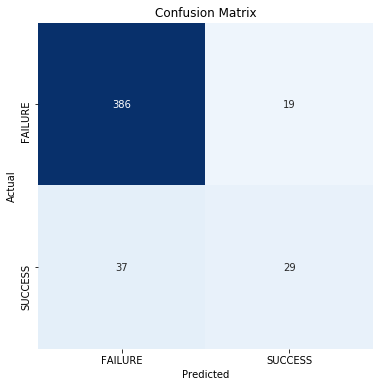

Classification Report:
----------------------
               precision    recall  f1-score   support

     FAILURE       0.91      0.95      0.93       405
     SUCCESS       0.60      0.44      0.51        66

    accuracy                           0.88       471
   macro avg       0.76      0.70      0.72       471
weighted avg       0.87      0.88      0.87       471



In [21]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["FAILURE", "SUCCESS"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


In [22]:
predicted = np.array(model.predict(test_data) >= 0.5, dtype=np.int)

In [23]:
predicted = pd.DataFrame(predicted)

In [24]:
test_dataa = pd.read_csv('C:/Users/BASH/Desktop/sapa/test.csv')

In [25]:
predicted['ID'] = test_dataa['ID']

In [26]:
predicted.set_index('ID', inplace= True)

In [27]:
predicted.rename(columns = {0:'Response'}, inplace = True)

In [28]:
predicted.to_csv('predictions.csv')

In [29]:
predicted

,Response
ID,
ID_ZPMABNVX,0
ID_WFE91NAA,0
ID_JV11RBRK,0
ID_6B7SVKY9,1
ID_GOVUZ545,0
...,...
ID_1D68PV28,0
ID_TM6CYFZO,0
ID_VHR666SC,0


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')